# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [47]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import math 
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Quick exploratory analysis 

### Summary Statistics

In [18]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Histograms

The summary statistics above suggest a long tail in the distribution across all variables, which is common in purchase dollar data. The histograms in red below confirmed that this is the case. 

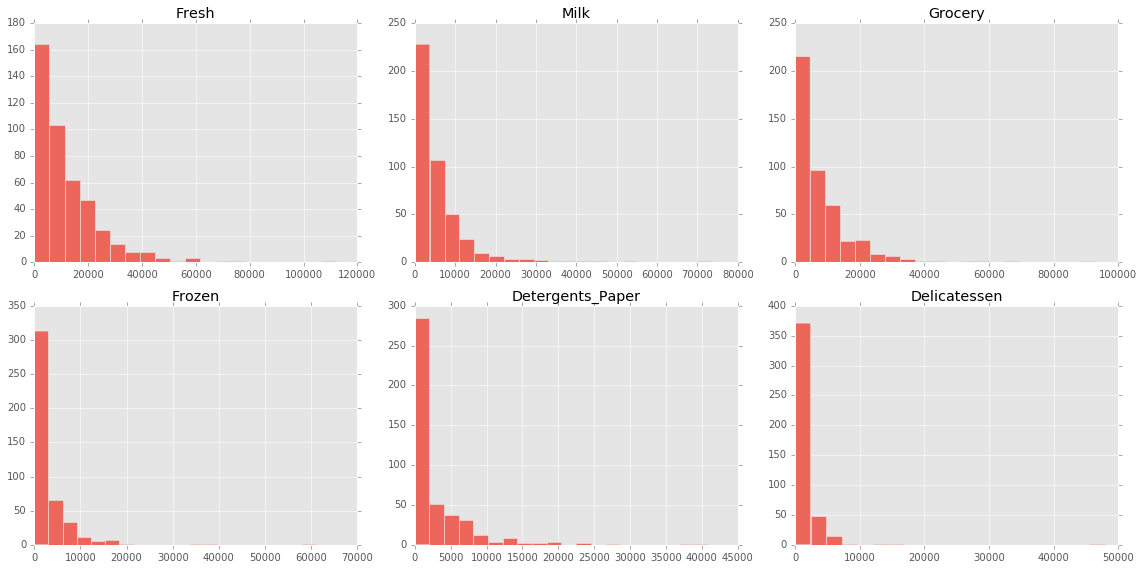

In [61]:
plt.figure(figsize=(16,8))

for i, j in zip(range(6), data.columns):
    plot_no = 231 + i 
    plt.subplot(plot_no)
    plt.hist(data[j], bins=20, color = (0.93,0.4,0.36))
    plt.title(j)

plt.tight_layout()

### Log transformation 

Since many statistical techniques, including PCA, assume normal distribution, we will perform a log transformation in an attempt to normalize the data. The histograms in blue below show the transformed data, which certainly appear more normal than before. In addition, we also note that the log values of these variables all fall within the range of 0-12, thus no further scaling of data is necessary.

In [124]:
data_log = np.log(data)
data_log.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


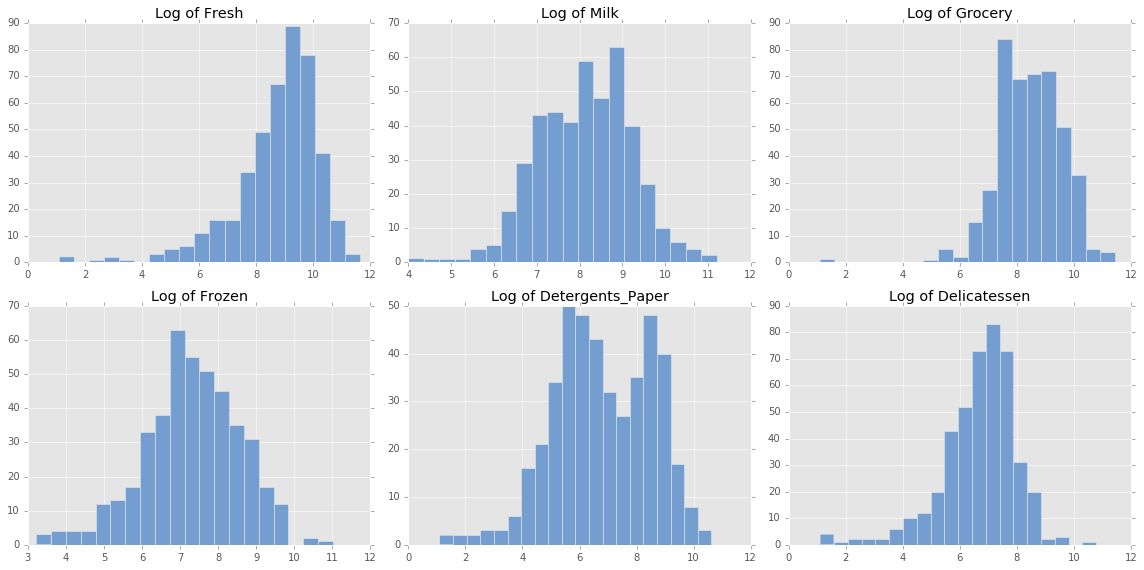

In [125]:
plt.figure(figsize=(16,8))

for i, j in zip(range(6), data_log.columns):
    plot_no = 231 + i 
    plt.subplot(plot_no)
    plt.hist(data_log[j], bins=20, color = (0.45,0.62,0.81))
    plt.title('Log of '+ j)

plt.tight_layout()

### Scatterplot Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e2e5510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12f19d590>]], dtype=object)

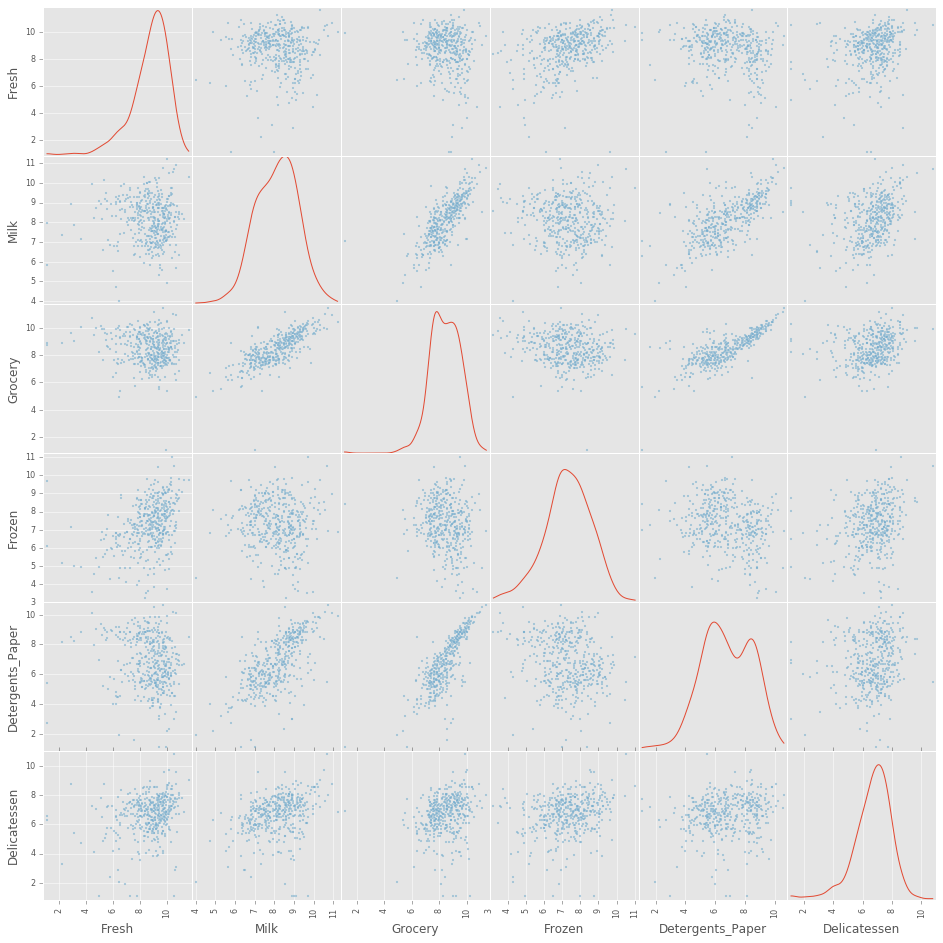

In [126]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data_log, alpha=.5, figsize=(16, 16), diagonal='kde')

### Correlation Matrix 

In [127]:
data_log.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


Grocery, Milk, and Detergents_Paper appear to be highly correlated and are likely to be explained by one underlying principal component. 

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: The first PCA and ICA dimension is likely to be a catch-all term for grocery and related goods such as milk and detergents_paper. 

### PCA

In [151]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data_scaled)

# Print the components and the amount of variance in the data contained in each dimension
print "The PCA components are:"
print pca.components_
print ""
print "The explained variance ratios are:"
print pca.explained_variance_ratio_

The PCA components are:
[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]

The explained variance ratios are:
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The majority of the variance is captured by the first two PCA components, accounting for 44% and 28% of the variance respectively. There is a significant drop off after these two components, although the third and fourth PCA components still account for a respectable 12% and 10% variance respectively. This is a relatively tough call: if I were interested in using the PCA components for prediction afterward, I am inclined to include up to 4 dimensions to retain up to 90% of the variance/information. However, during an exploratory analysis stage, I would choose N=2 dimensions for sake of simplicity and ease of interpretation through plotting. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimension indeed appears to be a catch-all term for the three highly-correlated purchase categories of "milk", "grocery", and "detergents_paper" as discussed earlier. On the other hand, the second component appears to be a catch-all term for the other three categories. This information allows us to reduce the dimension of our dataset, aggregating all the purchase data into two umbrella categories, which in turn allows us to visualize the dataset with our naked eye (which is exceptionally good at recognizing patterns and clusters). 

### ICA

In [145]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!

from sklearn.preprocessing import scale 
from sklearn.decomposition import FastICA

data_scaled = scale(data)
ica = FastICA(n_components=2)
ica.fit(data_scaled)

# Print the independent components
print ica.components_
df_ica = pd.DataFrame(ica.components_, columns=data.columns)
df_ica

[[ 0.00428116 -0.01445486 -0.01779666  0.00491391 -0.01807051 -0.00174881]
 [ 0.01884931  0.00745812 -0.00028734  0.02183787 -0.00436561  0.01973417]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.004281,-0.014455,-0.017797,0.004914,-0.018071,-0.001749
1,0.018849,0.007458,-0.000287,0.021838,-0.004366,0.019734


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [85]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [173]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_fit = PCA(n_components=2)
reduced_data = reduced_fit.fit_transform(data_scaled)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


In [174]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(reduced_data)
print kmeans

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [175]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [176]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = kmeans.cluster_centers_
print centroids

[[-3.67428358  0.40751388]
 [ 0.41858927 -0.04642563]]


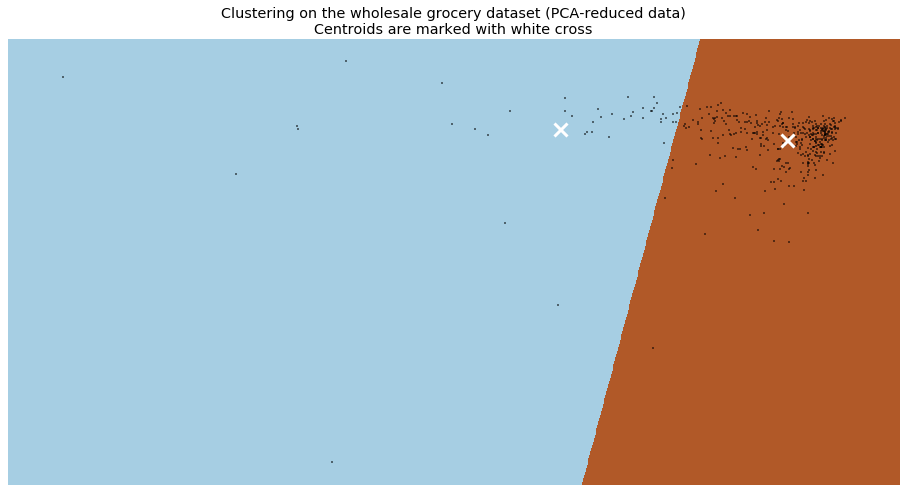

In [179]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

In [178]:
centroids_inverse = pca.inverse_transform(centroids)
print centroids_inverse
pd.DataFrame(centroids_inverse, columns=data.columns)

[[-0.05757185  1.96902732  2.18788507 -0.06102273  2.11987072  0.70825675]
 [ 0.00655882 -0.22431957 -0.24925273  0.00695196 -0.24150426 -0.08068748]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-0.057572,1.969027,2.187885,-0.061023,2.119871,0.708257
1,0.006559,-0.224320,-0.249253,0.006952,-0.241504,-0.080687


Answer: 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 